In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from ipywidgets import interactive, IntSlider, Output
import scipy as scp


In [82]:
stations = pd.read_excel('../data/historical-station-counts.xlsx')
st_stations = pd.read_csv('../output/station_counts_by_state.csv')

In [83]:
st_stations

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,year
0,Alabama,10.0,30.0,31.0,848,0.0,2.0,62.0,983.0,2022
1,Alaska,0.0,1.0,0.0,115,0.0,0.0,2.0,118.0,2022
2,Arizona,75.0,28.0,17.0,"2,638",1.0,5.0,65.0,2829.0,2022
3,Arkansas,17.0,10.0,74.0,598,0.0,0.0,36.0,735.0,2022
4,California,32.0,314.0,326.0,"43,400",58.0,40.0,246.0,44416.0,2022
...,...,...,...,...,...,...,...,...,...,...
811,Virginia,18.0,9.0,5.0,0.0,1.0,0.0,21.0,54.0,2007
812,Washington,37.0,13.0,7.0,0.0,0.0,0.0,55.0,112.0,2007
813,West Virginia,0.0,2.0,3.0,0.0,0.0,0.0,7.0,12.0,2007
814,Wisconsin,4.0,19.0,84.0,0.0,0.0,0.0,45.0,152.0,2007


In [84]:
st_stations.columns = st_stations.columns.str.lower()

In [85]:
st_stations.electric = st_stations.electric.str.replace(',', '').astype(float)

In [86]:
stations_year = st_stations.groupby('year').mean()
stations_electric = st_stations.groupby('state').mean()

In [87]:
stations_electric.reset_index(inplace=True)

In [88]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,Alaska,1.8125,3.8125,4.8125,26.3125,0.0000,0.3125,24.6875,61.7500,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5


In [89]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

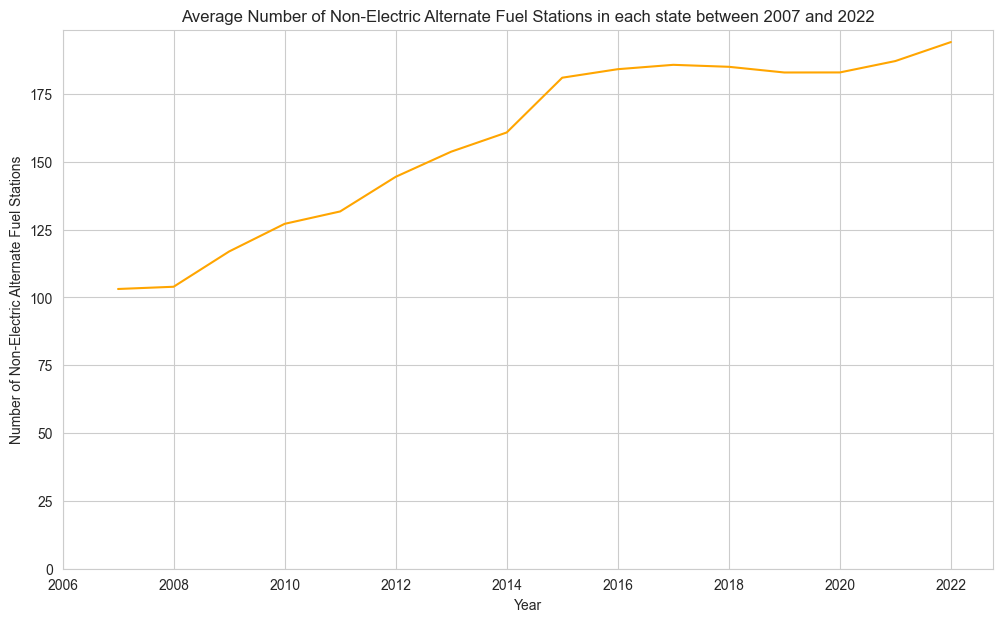

In [90]:
plt.figure(figsize = (12, 7))


plt.plot(st_stations.groupby('year').mean().total - st_stations.groupby('year').mean().electric, color = 'orange')
plt.xlim(2006)
plt.ylim(0)
plt.title('Average Number of Non-Electric Alternate Fuel Stations in each state between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Non-Electric Alternate Fuel Stations');

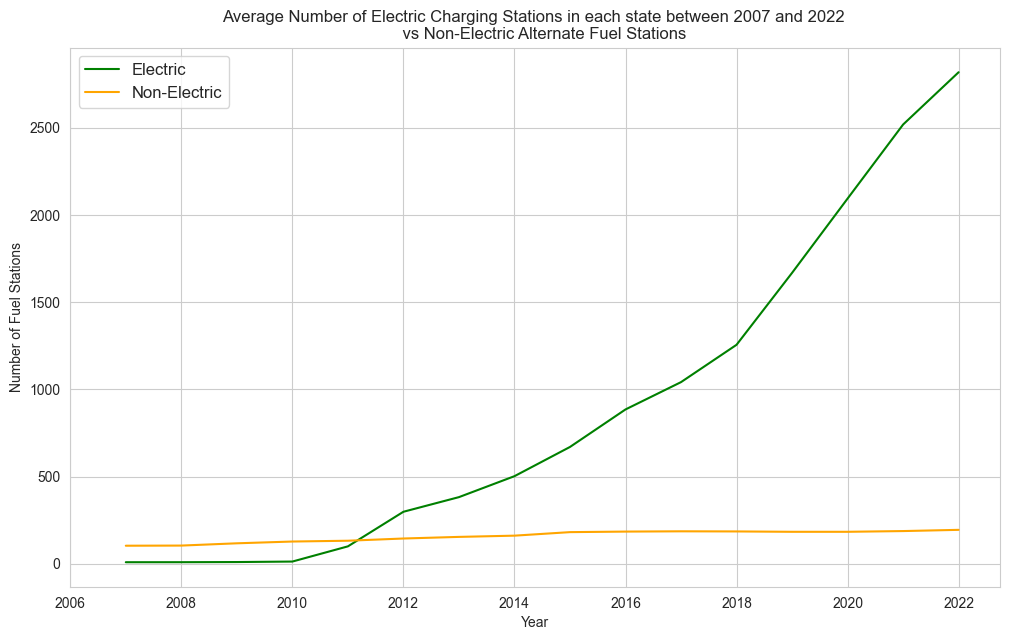

In [91]:
plt.figure(figsize = (12, 7))

plt.plot(st_stations.groupby('year').mean().electric, color = 'green', label = 'Electric')
plt.plot(st_stations.groupby('year').mean().total - st_stations.groupby('year').mean().electric, 
         color = 'orange',
        label = 'Non-Electric')

plt.xlim(2006)
plt.title('''Average Number of Electric Charging Stations in each state between 2007 and 2022 
    vs Non-Electric Alternate Fuel Stations''')
plt.xlabel('Year')
plt.ylabel('Number of Fuel Stations')
plt.legend(fontsize = 12);

.

## Geopandas EDA Section
.
---

In [92]:
states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
type(states)

states = states.to_crs("EPSG:3395")

In [93]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-13051434.065 5496245.142 0.000, -..."


In [94]:
stations_electric.drop([1, 11], inplace = True)

In [95]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [96]:
states.sort_values('NAME').head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
41,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9..."
19,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -..."
20,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -..."
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
21,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -..."


In [97]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [98]:
states = states.sort_values('NAME')

In [99]:
states.rename(columns = {
    'NAME' : 'state'
}, inplace = True)

In [100]:
states_electric = pd.merge(states, stations_electric)

states_electric.dropna(inplace=True)

In [158]:
states_electric.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,state,LSAD,ALAND,AWATER,region,geometry,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9...",7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -...",46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
2,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -...",11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
3,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
4,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -...",14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5


In [103]:
states.drop_duplicates(keep = 'first', inplace=True)

In [104]:
states.shape

(49, 11)

In [106]:
aq = pd.read_csv('../output/air_quality_by_state.csv')

In [107]:
aq.replace('Alaska', np.nan).dropna(inplace = True)
aq.replace('Hawaii', np.nan).dropna(inplace = True)
aq.replace('District Of Columbia', np.nan).dropna(inplace = True)


In [108]:
aq.pct_unhealthy_for_sensitive_groups_days = aq.pct_unhealthy_for_sensitive_groups_days * 100

In [109]:
st_stations.replace('Alaska', np.nan).dropna(inplace = True)
st_stations.replace('Hawaii', np.nan).dropna(inplace = True)


In [110]:
pops = pd.read_csv('../data/state-populations.csv')
pops2 = pd.read_csv('../data/state-populations-2020-2022.csv')
pops3 = pd.read_excel('../data/state-populations-2000-2010.xls')

In [111]:
pops3.columns = pops3.loc[2,:]

In [112]:
pops3 = pops3.loc[8:58,:]

In [113]:
pops3.head()

2,NaN,NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,NaN,NaN
8,.Alabama,4447207,4452173,4467634.0,4480089.0,4503491.0,4530729.0,4569805.0,4628981.0,4672840.0,4718206.0,4757938.0,4779736,4785298
9,.Alaska,626933,627963,633714.0,642337.0,648414.0,659286.0,666946.0,675302.0,680300.0,687455.0,698895.0,710231,713985
10,.Arizona,5130247,5160586,5273477.0,5396255.0,5510364.0,5652404.0,5839077.0,6029141.0,6167681.0,6280362.0,6343154.0,6392017,6413737
11,.Arkansas,2673293,2678588,2691571.0,2705927.0,2724816.0,2749686.0,2781097.0,2821761.0,2848650.0,2874554.0,2896843.0,2915918,2921606
12,.California,33871653,33987977,34479458.0,34871843.0,35253159.0,35574576.0,35827943.0,36021202.0,36250311.0,36604337.0,36961229.0,37253956,37349363


In [114]:
pops3.columns.values[0] = 0

In [115]:
pops3

2,0.0,NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,NaN,NaN
8,.Alabama,4447207,4452173,4467634.0,4480089.0,4503491.0,4530729.0,4569805.0,4628981.0,4672840.0,4718206.0,4757938.0,4779736,4785298
9,.Alaska,626933,627963,633714.0,642337.0,648414.0,659286.0,666946.0,675302.0,680300.0,687455.0,698895.0,710231,713985
10,.Arizona,5130247,5160586,5273477.0,5396255.0,5510364.0,5652404.0,5839077.0,6029141.0,6167681.0,6280362.0,6343154.0,6392017,6413737
11,.Arkansas,2673293,2678588,2691571.0,2705927.0,2724816.0,2749686.0,2781097.0,2821761.0,2848650.0,2874554.0,2896843.0,2915918,2921606
12,.California,33871653,33987977,34479458.0,34871843.0,35253159.0,35574576.0,35827943.0,36021202.0,36250311.0,36604337.0,36961229.0,37253956,37349363
13,.Colorado,4302086,4326921,4425687.0,4490406.0,4528732.0,4575013.0,4631888.0,4720423.0,4803868.0,4889730.0,4972195.0,5029196,5049071
14,.Connecticut,3405650,3411777,3432835.0,3458749.0,3484336.0,3496094.0,3506956.0,3517460.0,3527270.0,3545579.0,3561807.0,3574097,3577073
15,.Delaware,783559,786373,795699.0,806169.0,818003.0,830803.0,845150.0,859268.0,871749.0,883874.0,891730.0,897934,899769
16,.District of Columbia,572086,572046,574504.0,573158.0,568502.0,567754.0,567136.0,570681.0,574404.0,580236.0,592228.0,601723,604453
17,.Florida,15982571,16047515,16356966.0,16689370.0,17004085.0,17415318.0,17842038.0,18166990.0,18367842.0,18527305.0,18652644.0,18801310,18843326


In [116]:
pops3 = pops3[[0, 2008, 2009]].rename(columns = {
    0.0 : 'name',
    2008.0 : 'popestimate2008',
    2009.0 : 'popestimate2009'
})

In [117]:
pops3.name = pops3.name.str[1:]

In [118]:
pops3 = pops3.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 
              'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia',
              'New England', 'Middle Atlantic', 'East North Central', 'West North Central',
              'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'
                      ]
            , np.nan).dropna()

In [119]:
pops3.shape

(48, 3)

In [120]:
pops2

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,40,4,9,53,Washington,7705247,7724031,7740745,7785786,18784,...,8.400898,9.117040,2.264113,1.737928,1.809144,4.831987,-1.990071,-0.461146,-0.180927,4.370841
62,40,3,5,54,West Virginia,1793755,1791420,1785526,1775156,-2335,...,15.341020,16.649619,-5.665727,-6.829029,0.406492,0.995877,1.602484,0.266241,2.008976,1.262118
63,40,2,3,55,Wisconsin,5893725,5896271,5880101,5892539,2546,...,10.496442,10.770227,-0.305357,-0.298659,0.541593,1.388643,-3.209987,1.300813,-2.668394,2.689456
64,40,4,8,56,Wyoming,576837,577605,579483,581381,768,...,10.706187,11.506947,-0.063954,-0.844199,0.233344,0.589216,3.085331,3.707583,3.318676,4.296800


In [121]:
pops = pops.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia']
            , np.nan).dropna()
pops2 = pops2.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 
              'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia',
              'New England', 'Middle Atlantic', 'East North Central', 'West North Central',
              'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'
                      ]
            , np.nan).dropna()

In [122]:
pops2.shape

(48, 45)

In [123]:
pops.columns = pops.columns.str.lower()
pops2.columns = pops2.columns.str.lower()

In [124]:
pops = pops.loc[:, ['name', 
                                'popestimate2010', 
                                'popestimate2011', 
                                'popestimate2012', 
                                'popestimate2013', 
                                'popestimate2014', 
                                'popestimate2015', 
                                'popestimate2016', 
                                'popestimate2017', 
                                'popestimate2018', 
                                'popestimate2019'
                               ]]
pops2 = pops2.loc[:,['name', 'popestimate2020', 'popestimate2021','popestimate2022',]]

In [125]:
pops.shape, pops2.shape, pops3.shape

((48, 11), (48, 4), (48, 3))

In [126]:
populations = pd.merge(pops3, pops)

In [127]:
populations = pd.merge(populations, pops2)

In [128]:
populations.shape

(48, 16)

In [129]:
populations

,name,popestimate2008,popestimate2009,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019,popestimate2020,popestimate2021,popestimate2022
0,Alabama,4718206.0,4757938.0,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031362,5049846,5074296
1,Arizona,6280362.0,6343154.0,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,7179943,7264877,7359197
2,Arkansas,2874554.0,2896843.0,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3014195,3028122,3045637
3,California,36604337.0,36961229.0,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,39501653,39142991,39029342
4,Colorado,4889730.0,4972195.0,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736,5784865,5811297,5839926
5,Connecticut,3545579.0,3561807.0,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287,3597362,3623355,3626205
6,Delaware,883874.0,891730.0,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764,992114,1004807,1018396
7,Florida,18527305.0,18652644.0,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737,21589602,21828069,22244823
8,Georgia,9504843.0,9620846.0,9711881,9802431,9901430,9972479,10067278,10178447,10301890,10410330,10511131,10617423,10729828,10788029,10912876
9,Idaho,1534320.0,1554439.0,1570746,1583910,1595324,1611206,1631112,1651059,1682380,1717715,1750536,1787065,1849202,1904314,1939033


In [130]:
populations = populations.melt(id_vars=['name'], var_name='year', value_name='population')


In [131]:
populations.year = populations.year.str[-4:]

In [132]:
populations.rename(columns = {
    'name' : 'state'
}, inplace = True)

In [133]:
populations

,state,year,population
0,Alabama,2008,4718206.0
1,Arizona,2008,6280362.0
2,Arkansas,2008,2874554.0
3,California,2008,36604337.0
4,Colorado,2008,4889730.0
...,...,...,...
715,Virginia,2022,8683619.0
716,Washington,2022,7785786.0
717,West Virginia,2022,1775156.0
718,Wisconsin,2022,5892539.0


In [134]:
populations.isnull().sum()

state         0
year          0
population    0
dtype: int64

In [135]:
populations.year = populations.year.astype(int)

In [136]:
pop_stations = st_stations.copy()

In [137]:
pop_stations = populations.merge(pop_stations, on = ['state', 'year'])

In [138]:
pop_stations.head()

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total
0,Alabama,2008,4718206.0,11.0,3.0,6.0,0.0,0.0,0.0,40.0,60.0
1,Arizona,2008,6280362.0,10.0,40.0,23.0,5.0,1.0,5.0,51.0,135.0
2,Arkansas,2008,2874554.0,2.0,3.0,7.0,0.0,0.0,0.0,37.0,49.0
3,California,2008,36604337.0,36.0,184.0,13.0,376.0,26.0,28.0,199.0,862.0
4,Colorado,2008,4889730.0,18.0,18.0,65.0,0.0,0.0,0.0,43.0,144.0


In [139]:
pop_stations['electric_by_pop'] = pop_stations.electric / (pop_stations.population / 10_000)

In [140]:
pop_stations[pop_stations.state == 'West Virginia']

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
45,West Virginia,2008,1840310.0,1.0,1.0,3.0,0.0,0.0,0.0,5.0,10.0,0.000000
93,West Virginia,2009,1847775.0,1.0,0.0,3.0,0.0,1.0,0.0,8.0,13.0,0.000000
141,West Virginia,2010,1854239.0,1.0,1.0,3.0,0.0,1.0,0.0,8.0,14.0,0.000000
189,West Virginia,2011,1856301.0,2.0,17.0,140.0,60.0,0.0,0.0,48.0,267.0,0.323223
237,West Virginia,2012,1856872.0,4.0,31.0,126.0,185.0,0.0,1.0,51.0,398.0,0.996299
285,West Virginia,2013,1853914.0,4.0,45.0,115.0,211.0,0.0,1.0,54.0,430.0,1.138133
333,West Virginia,2014,1849489.0,2.0,3.0,9.0,101.0,0.0,0.0,12.0,127.0,0.546097
381,West Virginia,2015,1842050.0,2.0,3.0,9.0,68.0,0.0,0.0,16.0,98.0,0.369154
429,West Virginia,2016,1831023.0,2.0,4.0,11.0,96.0,0.0,0.0,13.0,126.0,0.524297
477,West Virginia,2017,1817004.0,2.0,3.0,33.0,199.0,0.0,0.0,10.0,247.0,1.095209


In [141]:
slider = IntSlider(min=2008, max=2022, step=1, value=0, description='Year')

output = Output()

def plot_heatmap(year):
    output.clear_output(wait=True)
    cmap_e = 'Greens'
    year_stations = pop_stations[pop_stations.year == year]
    states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
    states = states.to_crs("EPSG:3395")
    states = states.sort_values('NAME')
    states.rename(columns={
        'NAME': 'state'
    }, inplace=True)
    year_stations = pd.merge(states, year_stations)
    year_stations.dropna(inplace=True)
    vmin_e = year_stations['electric_by_pop'].min()
    vmax_e = year_stations['electric_by_pop'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_stations.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_stations.boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_stations.plot(column='electric_by_pop', ax=ax, linewidth=1, cmap=cmap_e)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_e, vmax=vmax_e), cmap=cmap_e)
        sm._A = []
        ax.set_title(f'Electric Charging Stations per 10,000 population in the US {year}', fontsize=20)

        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)
        
    cmap_aq = 'Blues'
    year_aq = aq[aq.year == year]

    year_aq = pd.merge(states, year_aq)
    year_aq.dropna(inplace=True)

    vmin_aq = year_aq['pct_bad_days'].min()
    vmax_aq = year_aq['pct_bad_days'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_aq.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_aq.boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_aq.plot(column='pct_bad_days', ax=ax, linewidth=1, cmap=cmap_aq)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_aq, vmax=vmax_aq), cmap=cmap_aq)
        sm._A = []
        ax.set_title(f'Percentage of Days Air Quality was classed "Bad" {year}', fontsize=20)

        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

slider = interactive(plot_heatmap, year=slider)
display(slider, output)

interactive(children=(IntSlider(value=2008, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

Output()

In [159]:
pop_stations.head()

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
0,Alabama,2008,4718206.0,11.0,3.0,6.0,0.0,0.0,0.0,40.0,60.0,0.000000
1,Arizona,2008,6280362.0,10.0,40.0,23.0,5.0,1.0,5.0,51.0,135.0,0.007961
2,Arkansas,2008,2874554.0,2.0,3.0,7.0,0.0,0.0,0.0,37.0,49.0,0.000000
3,California,2008,36604337.0,36.0,184.0,13.0,376.0,26.0,28.0,199.0,862.0,0.102720
4,Colorado,2008,4889730.0,18.0,18.0,65.0,0.0,0.0,0.0,43.0,144.0,0.000000


In [143]:
pop_stations.to_csv('../output/charging-stations-population.csv')

In [144]:
pop_stations[pop_stations.state == 'Texas']

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
40,Texas,2008,24309039.0,52.0,17.0,35.0,1.0,0.0,4.0,484.0,593.0,0.000411
88,Texas,2009,24801761.0,20.0,20.0,41.0,3.0,0.0,4.0,541.0,629.0,0.001210
136,Texas,2010,25241971.0,17.0,30.0,48.0,26.0,1.0,4.0,520.0,646.0,0.010300
184,Texas,2011,25645629.0,14.0,35.0,58.0,388.0,1.0,5.0,491.0,992.0,0.151293
232,Texas,2012,26084481.0,17.0,52.0,80.0,1310.0,1.0,9.0,471.0,1940.0,0.502214
280,Texas,2013,26480266.0,20.0,62.0,81.0,1599.0,1.0,10.0,458.0,2231.0,0.603846
328,Texas,2014,26964333.0,17.0,97.0,136.0,1839.0,1.0,10.0,441.0,2541.0,0.682012
376,Texas,2015,27470056.0,21.0,116.0,197.0,2024.0,1.0,16.0,489.0,2864.0,0.736802
424,Texas,2016,27914410.0,17.0,132.0,193.0,2440.0,1.0,20.0,487.0,3290.0,0.874101
472,Texas,2017,28295273.0,18.0,127.0,215.0,2719.0,1.0,23.0,470.0,3573.0,0.960938


In [145]:
aq[aq.state == 'Texas']

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
989,Texas,2000,280.000000,157.771429,86.057143,39.742857,0.695869,0.233018,5.264839,0.016197,0.002267,0.000000,0.012802,0.038166,0.606436,0.333223,0.009372,0.304131
990,Texas,2001,299.666667,150.527778,77.972222,40.166667,0.714477,0.238805,3.679744,0.008320,0.001525,0.000076,0.007078,0.033141,0.587225,0.358009,0.014547,0.285523
991,Texas,2002,308.444444,171.777778,78.777778,39.111111,0.724744,0.219175,4.057637,0.013062,0.002291,0.000152,0.005479,0.031995,0.571649,0.366218,0.024659,0.275256
992,Texas,2003,289.736842,152.078947,79.500000,39.736842,0.711605,0.238745,3.782167,0.010168,0.001660,0.000000,0.004470,0.028153,0.602998,0.344191,0.020188,0.288395
993,Texas,2004,306.500000,152.789474,75.026316,37.157895,0.761136,0.193360,3.505208,0.009228,0.001224,0.000000,0.002660,0.034500,0.653711,0.282884,0.026244,0.238864
994,Texas,2005,324.536585,144.097561,82.926829,42.243902,0.650736,0.290143,4.822920,0.010015,0.000876,0.000000,0.000335,0.019428,0.499730,0.472478,0.008030,0.349264
995,Texas,2006,341.512821,148.230769,79.282051,41.051282,0.684805,0.265072,4.033819,0.008731,0.000983,0.000070,0.000140,0.017871,0.534241,0.438264,0.009484,0.315195
996,Texas,2007,332.309524,131.309524,67.047619,39.690476,0.716971,0.257889,2.154592,0.003464,0.000130,0.000000,0.000523,0.015904,0.507483,0.468979,0.007112,0.283029
997,Texas,2008,335.581395,127.372093,65.930233,39.790698,0.730123,0.249379,1.882755,0.001607,0.000064,0.000000,0.000257,0.017021,0.522551,0.455266,0.004906,0.269877
998,Texas,2009,336.800000,121.688889,64.377778,38.555556,0.755503,0.227429,1.463029,0.002316,0.000122,0.000000,0.000304,0.014095,0.548479,0.434195,0.002926,0.244497


(0.0, 8.0)

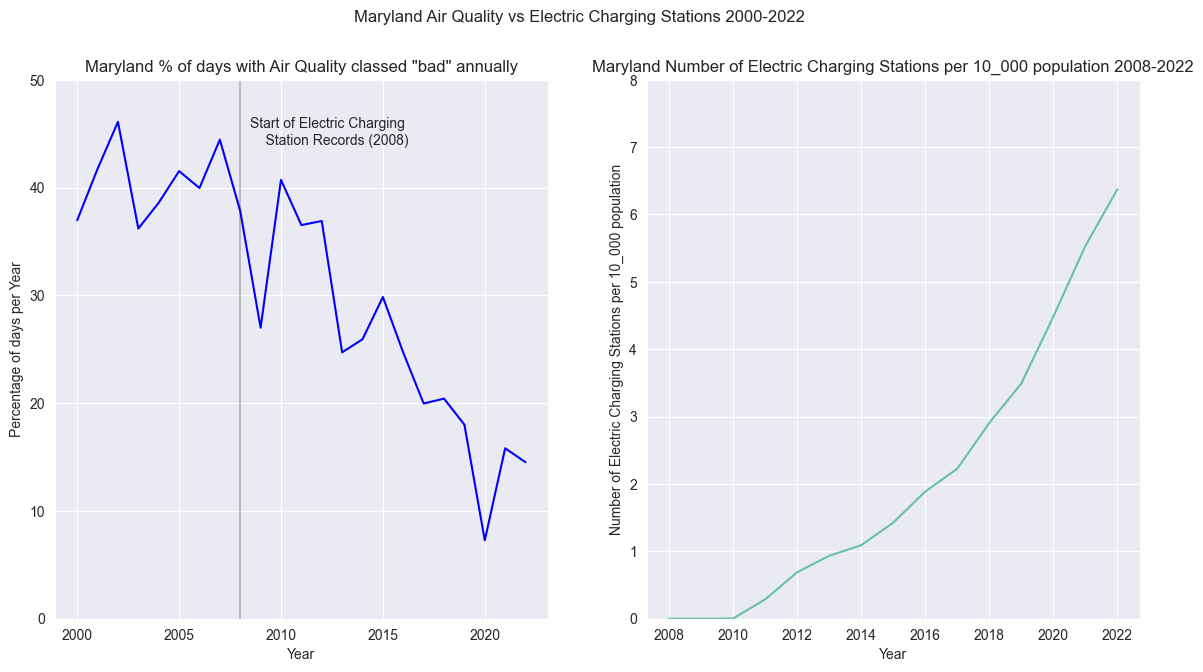

In [146]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('Maryland Air Quality vs Electric Charging Stations 2000-2022')
axs[0] = sns.lineplot(x = aq[aq.state == 'Maryland'].year, 
                  y = aq[aq.state == 'Maryland'].pct_bad_days * 100,
                     ax = axs[0],
                     color = 'blue')
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 44, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'Maryland % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')
axs[0].set_ylim(0,50)

axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'Maryland'].year, 
                  y = pop_stations[pop_stations.state == 'Maryland'].electric_by_pop,
                     ax = axs[1])
axs[1].set(title = 'Maryland Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[1].set_ylim(0,8)


(0.0, 8.0)

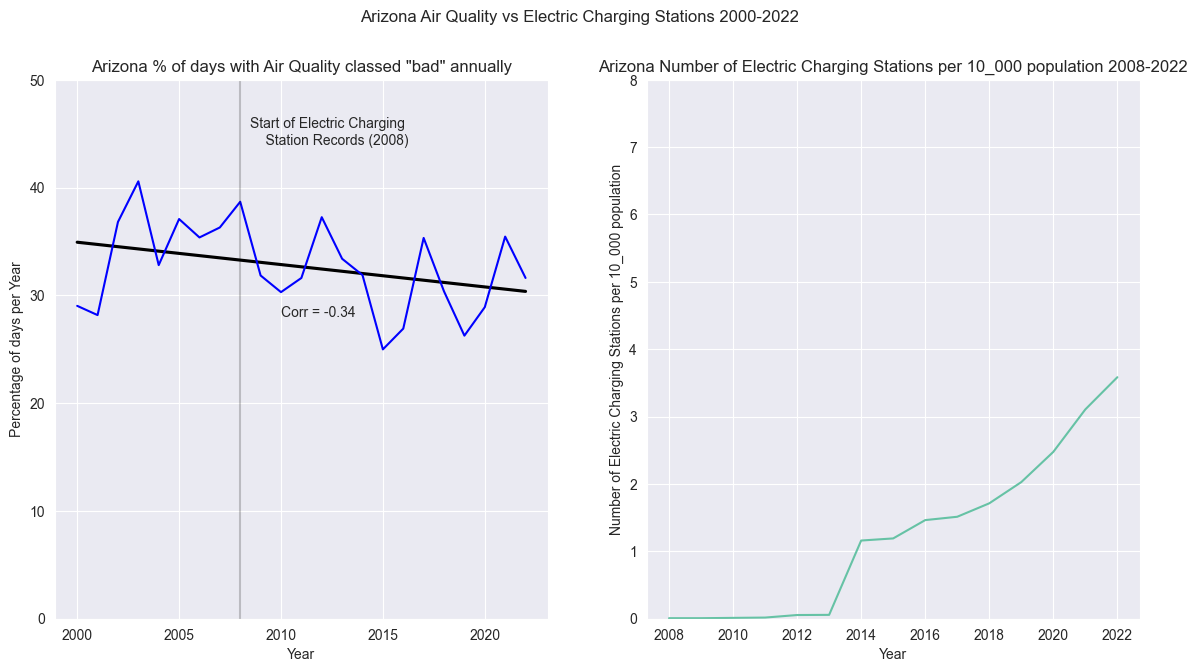

In [147]:
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('Arizona Air Quality vs Electric Charging Stations 2000-2022')
sns.regplot(x = aq[aq.state == 'Arizona'].year, 
            y = aq[aq.state == 'Arizona'].pct_bad_days * 100,
            scatter = False,
            ci = 0,
            color = 'black',
            ax = axs[0]
        )
r, p = scp.stats.pearsonr(x = aq[aq.state == 'Arizona'].year, 
            y = aq[aq.state == 'Arizona'].pct_bad_days)
axs[0].text(2010, 28, 'Corr = {:.2f}'.format(r))

axs[0] = sns.lineplot(x = aq[aq.state == 'Arizona'].year, 
                  y = aq[aq.state == 'Arizona'].pct_bad_days * 100,
                    color = 'blue',
                     ax = axs[0])
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 44, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'Arizona % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')

axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'Arizona'].year, 
                  y = pop_stations[pop_stations.state == 'Arizona'].electric_by_pop, 
                     ax = axs[1])
axs[1].set(title = 'Arizona Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[0].set_ylim(0,50)

axs[1].set_ylim(0,8)


In [148]:
# (aq[aq.state == 'California']) & 
(aq[aq.year > 2007])

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
8,Alabama,2008,267.052632,114.263158,68.421053,44.315789,0.649062,0.339415,1.057713,0.000946,0.000000,0.000000,0.003020,0.000000,0.474684,0.501658,0.020638,0.350938
9,Alabama,2009,272.368421,98.894737,59.052632,39.473684,0.752995,0.244101,0.290424,0.000000,0.000000,0.000000,0.000577,0.000000,0.435996,0.542251,0.021177,0.247005
10,Alabama,2010,282.263158,112.263158,70.315789,46.157895,0.606986,0.379970,1.208874,0.000955,0.000000,0.000000,0.000144,0.000000,0.425478,0.549293,0.025085,0.393014
11,Alabama,2011,248.526316,111.526316,69.421053,42.789474,0.695727,0.290738,1.248372,0.001052,0.000000,0.000000,0.000288,0.000000,0.566842,0.418499,0.014370,0.304273
12,Alabama,2012,263.588235,110.235294,62.176471,40.117647,0.777177,0.211164,1.101699,0.000643,0.000000,0.000000,0.000000,0.000000,0.597273,0.392065,0.010662,0.222823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,Wyoming,2018,329.666667,106.500000,58.611111,39.611111,0.789477,0.206487,0.357944,0.000457,0.000000,0.000000,0.000000,0.007854,0.779945,0.047889,0.164312,0.210523
1191,Wyoming,2019,343.888889,98.000000,51.944444,38.833333,0.871004,0.125178,0.336166,0.000457,0.000000,0.000000,0.000000,0.004811,0.818655,0.018977,0.157558,0.128996
1192,Wyoming,2020,338.352941,131.705882,50.352941,34.882353,0.876343,0.113637,0.798935,0.001768,0.000263,0.000000,0.000000,0.061075,0.654444,0.079556,0.204924,0.123657
1193,Wyoming,2021,349.941176,128.823529,65.235294,36.294118,0.783710,0.199038,1.693025,0.000161,0.000000,0.000161,0.000323,0.061565,0.693599,0.089626,0.154887,0.216290


(0.0, 50.0)

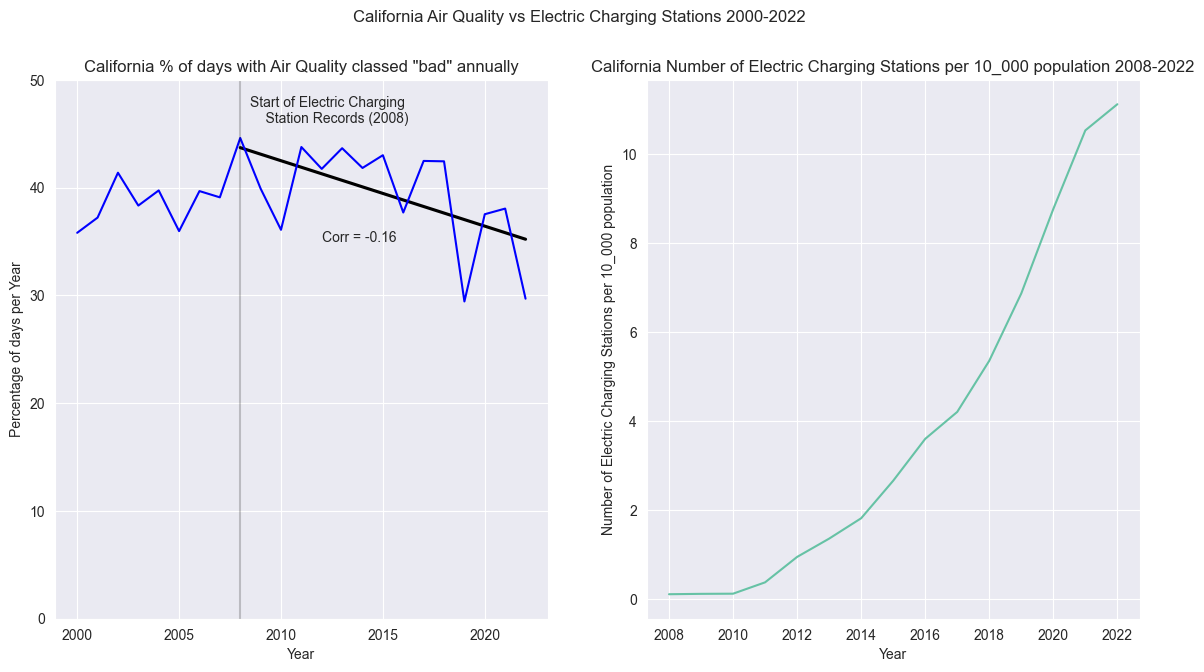

In [149]:
mask1 = aq.state == 'California'
mask2 = aq.year > 2007
cali_mask = (mask1) & (mask2)


fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('California Air Quality vs Electric Charging Stations 2000-2022')
sns.regplot(x = aq[cali_mask].year, 
            y = aq[cali_mask].pct_bad_days * 100,
            scatter = False,
            ci = 0,
            color = 'black',
            ax = axs[0]
        )
r, p = scp.stats.pearsonr(x = aq[aq.state == 'California'].year, 
            y = aq[aq.state == 'California'].pct_bad_days)
axs[0].text(2012, 35, 'Corr = {:.2f}'.format(r))
axs[0] = sns.lineplot(x = aq[aq.state == 'California'].year, 
                  y = aq[aq.state == 'California'].pct_bad_days * 100,
                    color = 'blue',
                     ax = axs[0])
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 46, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'California % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')


axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'California'].year, 
                  y = pop_stations[pop_stations.state == 'California'].electric_by_pop, 
                     ax = axs[1])
axs[1].set(title = 'California Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[0].set_ylim(0,50)



In [150]:
def make_plots(state):
    fig, axs = plt.subplots(1, 2, figsize = (14, 7))
    fig.suptitle(f'{state} Air Quality vs Electric Charging Stations 2000-2022')
    sns.regplot(x = aq[aq.state == state].year, 
                y = aq[aq.state == state].pct_bad_days * 100,
                scatter = False,
                ci = 0,
                color = 'black',
                ax = axs[0]
            )
    r, p = scp.stats.pearsonr(x = aq[aq.state == state].year, 
                y = aq[aq.state == state].pct_bad_days)
    axs[0].text(2010, (aq[aq.state == state].pct_bad_days.mean() * 100) + 5, 'Corr = {:.2f}'.format(r))

    axs[0] = sns.lineplot(x = aq[aq.state == state].year, 
                      y = aq[aq.state == state].pct_bad_days * 100,
                        color = 'blue',
                         ax = axs[0])
    axs[0].axvline(2008, alpha = 0.2, color = 'black')
    axs[0].text(2008.5, 44, '''Start of Electric Charging 
        Station Records (2008)''', fontsize=10, zorder = 11)
    axs[0].set(title = f'{state} % of days with Air Quality classed "bad" annually', 
               xlabel = 'Year',
               ylabel = 'Percentage of days per Year')

    axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == state].year, 
                      y = pop_stations[pop_stations.state == state].electric_by_pop, 
                         ax = axs[1])
    axs[1].set(title = f'{state} Number of Electric Charging Stations per 10_000 population 2008-2022', 
               xlabel = 'Year',
               ylabel = 'Number of Electric Charging Stations per 10_000 population')
    axs[0].set_ylim(0,50)

    axs[1].set_ylim(0,8)

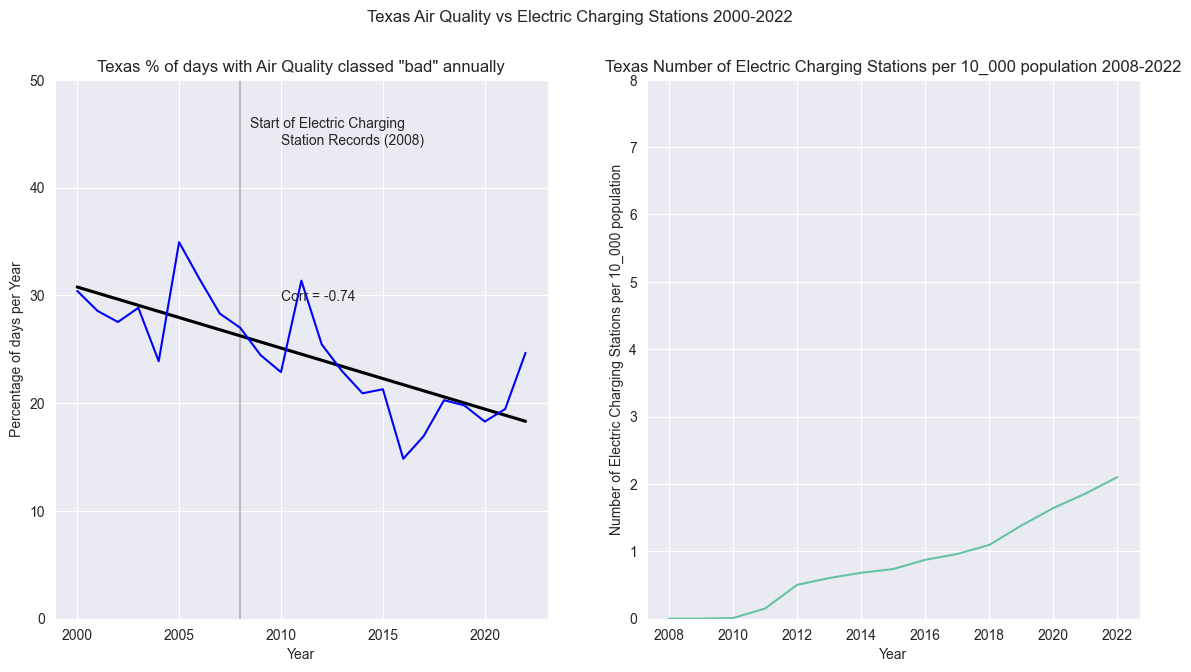

In [151]:
make_plots('Texas')

In [152]:
cars = pd.read_csv('../output/vehicle_counts_by_state.csv')

In [153]:
cars.columns = cars.columns.str.lower()

In [154]:
cars = cars.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia']
            , np.nan).dropna()

In [155]:
cars.ev = cars.ev.str.replace(',','',)

In [156]:
cars.ev = cars.ev.astype(int)

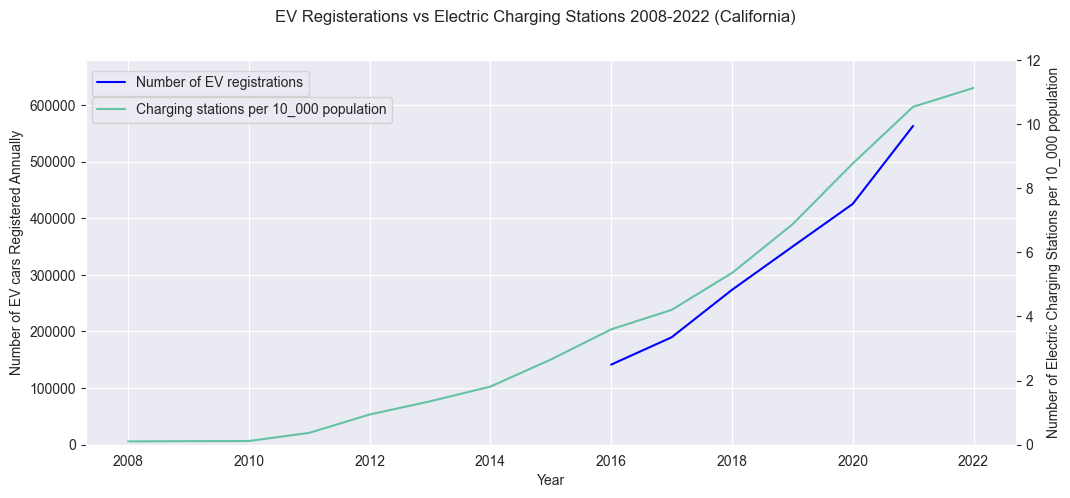

In [157]:
fig, axs = plt.subplots(1, figsize = (12, 5))
fig.suptitle('EV Registerations vs Electric Charging Stations 2008-2022 (California)')


axs = sns.lineplot(x = cars[cars.state == 'California'].year, 
                  y = cars[cars.state == 'California'].ev,
                    color = 'blue',
                     ax = axs,
                  label = 'Number of EV registrations')


axs.set(xlabel = 'Year',
           ylabel = 'Number of EV cars Registered Annually')
axs.set_ylim(0, 680_000)
axs.legend(bbox_to_anchor = (0.247, 0.99))

ax2 = axs.twinx()
ax2.grid(False)

axs = sns.lineplot(x = pop_stations[pop_stations.state == 'California'].year, 
                  y = pop_stations[pop_stations.state == 'California'].electric_by_pop, 
                     ax = ax2,
                  label = 'Charging stations per 10_000 population')
axs.set(   xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs.set_ylim(0)
axs.set_ylim(0,12)
ax2.legend(bbox_to_anchor = (0.337, 0.92))

